In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
figure_size = (12, 8)

In [2]:
reportdf = pd.read_csv('$report.csv', index_col=0)

In [3]:
# Kanji N+ means that X Kanji appear N+ times
# E.g. for Fate/Strange Fake 第01巻 691 Kanji appear 10+ times
reportdf.head()

,Name,Number Tokens,Total Words,Total Kanji,Kanji 10+,Kanji 5+,Kanji 2+
Index,,,,,,,
0,(一般小説) [成田良悟] Fate／Strange Fake 第01巻,32389,5398,1842,691,1017,1453
1,(一般小説) [成田良悟] Fate／Strange Fake 第02巻,33581,5240,1756,686,982,1435
2,(一般小説) [榎戸洋司・GAINAX] フリクリ 第1巻,18452,3583,1482,423,666,1116
3,(一般小説) [榎戸洋司・GAINAX] フリクリ 第2巻,18684,3602,1452,416,657,1087
4,(一般小説) [榎戸洋司・GAINAX] フリクリ 第3巻,20768,4071,1555,477,729,1176


In [4]:
kall = reportdf['Total Kanji'].to_numpy()
k10 = reportdf['Kanji 10+'].to_numpy()
k5 = reportdf['Kanji 5+'].to_numpy()
k2 = reportdf['Kanji 2+'].to_numpy()

In [5]:
bins = np.linspace(0, np.max(kall), 500)

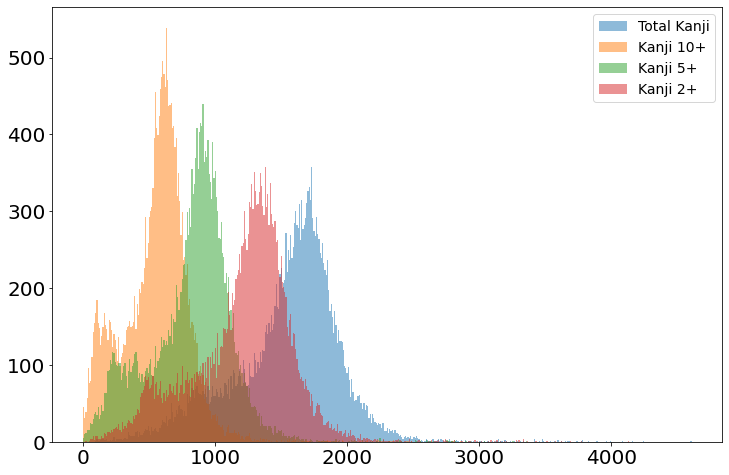

In [6]:
fig = plt.figure()
fig.set_size_inches(figure_size[0], figure_size[1])
ax = plt.axes()
ax.tick_params(labelsize=20)
plt.hist(kall, bins, alpha=0.5, label='Total Kanji')
plt.hist(k10, bins, alpha=0.5, label='Kanji 10+')
plt.hist(k5, bins, alpha=0.5, label='Kanji 5+')
plt.hist(k2, bins, alpha=0.5, label='Kanji 2+')
plt.legend(loc='upper right', prop={'size': 14})
plt.savefig('frequency_histogram.png', dpi=150, facecolor='white', bbox_inches='tight', pad_inches=0.5)
plt.show()

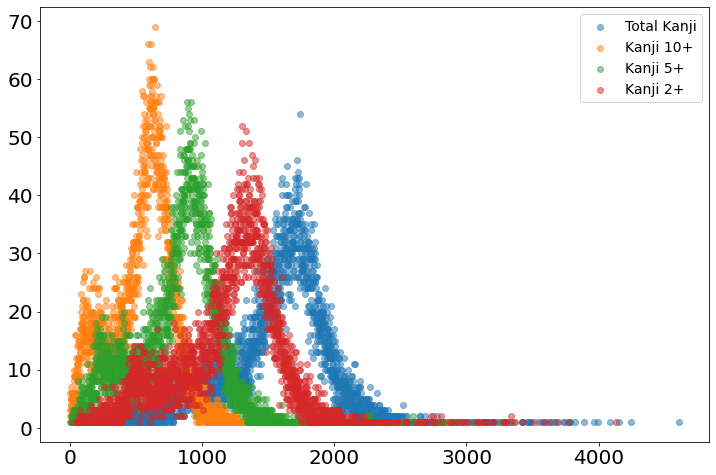

In [7]:
from collections import Counter
xall, yall = zip(*Counter(list(kall)).items())
xk10, yk10 = zip(*Counter(list(k10)).items())
xk5, yk5 = zip(*Counter(list(k5)).items())
xk2, yk2 = zip(*Counter(list(k2)).items())


fig = plt.figure()
fig.set_size_inches(figure_size[0], figure_size[1])
ax = plt.axes()
ax.tick_params(labelsize=20)
plt.scatter(xall, yall, alpha=0.5, label='Total Kanji')
plt.scatter(xk10, yk10, alpha=0.5, label='Kanji 10+')
plt.scatter(xk5, yk5, alpha=0.5, label='Kanji 5+')
plt.scatter(xk2, yk2, alpha=0.5, label='Kanji 2+')
plt.legend(loc='upper right', prop={'size': 14})
plt.savefig('frequency_scatter.png', dpi=150, facecolor='white', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [8]:
# all of these distributions will be tested against the data
# the best fitting ones according to the K-S test will be plotted next to the normalized histogram
list_of_dists = [
    'genlogistic',
'johnsonsu',
'mielke',
'fisk',
'hypsecant',
'dweibull',
'logistic',
'gennorm',
'dgamma',
'laplace',
'powernorm',
'loggamma',
'burr12',
'cauchy',
'beta',
'vonmises_line',
'johnsonsb',
'betaprime',
'norm',
'nct',
'exponnorm',
'chi',
'foldcauchy',
'gamma',
'chi2',
'loglaplace',
'gumbel_l',
'alpha'
]

In [9]:
from scipy import stats
# some dists result in some warnings scipy will print
# we just ignore them for now
import warnings
warnings.filterwarnings('ignore')
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(reportdf['Total Kanji'])
    a = stats.kstest(reportdf['Total Kanji'], i, args=param)
    results.append((i,a[0],a[1]))
results.sort(key=lambda x:float(x[2]), reverse=True)

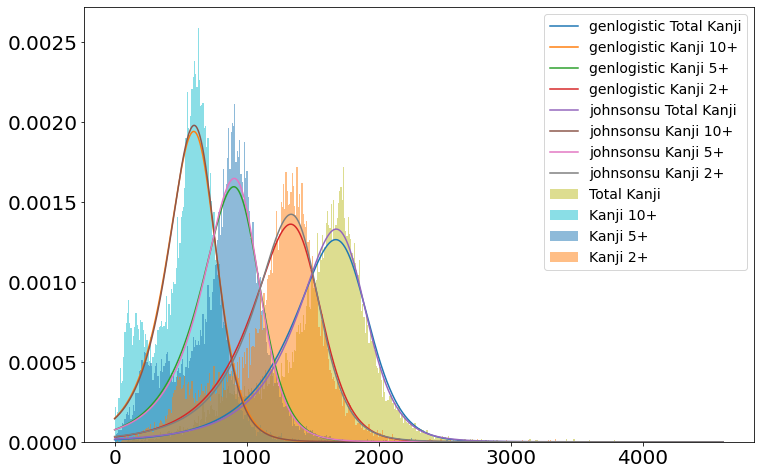

In [10]:
fig = plt.figure()
fig.set_size_inches(figure_size[0], figure_size[1])
ax = plt.axes()
ax.tick_params(labelsize=20)

x = np.arange(np.max(kall))
histos = [kall, k10, k5, k2]
labos = ['Total Kanji', 'Kanji 10+', 'Kanji 5+', 'Kanji 2+']
for j in results[:2]:
    for idx in range(len(histos)):
        dist = getattr(stats, f'{j[0]}')
        param = dist.fit(histos[idx])
        pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
        plt.plot(pdf_fitted, label=f'{j[0]} {labos[idx]}')
for idx in range(len(histos)):
    plt.hist(histos[idx], bins, alpha=0.5, label=labos[idx], density=True)

plt.legend(loc='upper right', prop={'size': 14})
plt.savefig('frequency_distribution.png', dpi=150, facecolor='white', bbox_inches='tight', pad_inches=0.5)
plt.show()